Training Dataset Size: 10000 samples
Testing Dataset Size: 2000 samples


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5288 - loss: 0.6894 - val_accuracy: 0.6060 - val_loss: 0.6493
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6583 - loss: 0.6226 - val_accuracy: 0.6915 - val_loss: 0.5816
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.5706 - val_accuracy: 0.7155 - val_loss: 0.5507
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7334 - loss: 0.5217 - val_accuracy: 0.7395 - val_loss: 0.5109
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.5051 - val_accuracy: 0.7375 - val_loss: 0.5140
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7720 - loss: 0.4848 - val_accuracy: 0.7410 - val_loss: 0.5085
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7925 - loss: 0.4412 - val_accuracy: 0.7520 - val_loss: 0.5084
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8024 - loss: 0.4132 - val_accuracy: 0

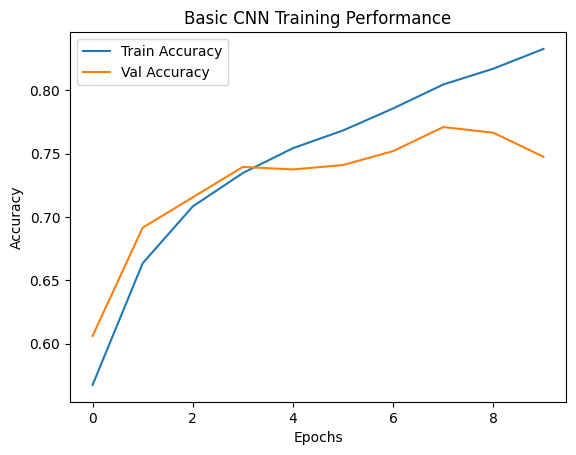

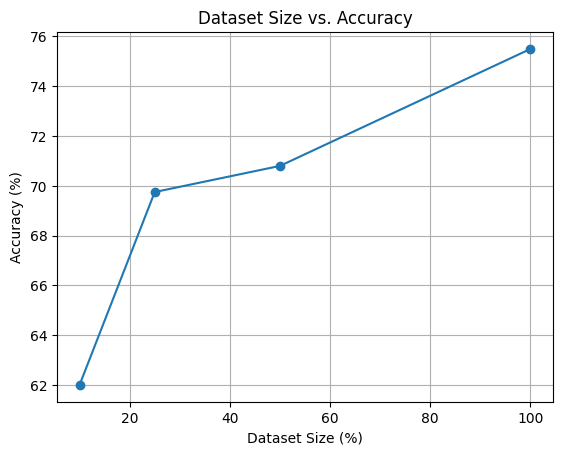

In [1]:
# Student Deatils
# Krishna Rani - 10065013
# Mohammad Sukri - 10062921
# Shilin Elizabeth Josline - 10065015


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Step 1: Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Filter for cats (class 3) and dogs (class 5)
def filter_cats_and_dogs(x, y):
    filter_mask = (y == 3) | (y == 5)
    x_filtered = x[filter_mask.squeeze()]
    y_filtered = y[filter_mask.squeeze()]
    y_filtered = (y_filtered == 5).astype(np.int32)  # Dog = 1, Cat = 0
    return x_filtered, y_filtered

# Split dataset for cats and dogs
x_train_cats_dogs, y_train_cats_dogs = filter_cats_and_dogs(x_train, y_train)
x_test_cats_dogs, y_test_cats_dogs = filter_cats_and_dogs(x_test, y_test)

# Display dataset size
print(f"Training Dataset Size: {len(x_train_cats_dogs)} samples")
print(f"Testing Dataset Size: {len(x_test_cats_dogs)} samples")

# Normalize the data
x_train_cats_dogs, x_test_cats_dogs = x_train_cats_dogs / 255.0, x_test_cats_dogs / 255.0

# Step 2: Train a Basic CNN for Cats vs. Dogs Classification
basic_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

basic_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN
import time

# Measure time taken for CNN training
start_time = time.time()
history_cnn = basic_cnn.fit(x_train_cats_dogs, y_train_cats_dogs, epochs=10, batch_size=64,
                             validation_data=(x_test_cats_dogs, y_test_cats_dogs))
cnn_training_time = time.time() - start_time

# Print training time
print(f"Time taken to train CNN: {cnn_training_time:.2f} seconds")

# Get final CNN accuracy
cnn_accuracy = history_cnn.history['val_accuracy'][-1] * 100
print(f"CNN Accuracy: {cnn_accuracy:.2f}%")

# Step 3: Pre-train a Denoising Autoencoder
# Filter out cats and dogs for pre-training
def filter_non_cats_and_dogs(x, y):
    filter_mask = (y != 3) & (y != 5)
    return x[filter_mask.squeeze()], y[filter_mask.squeeze()]

x_train_other, _ = filter_non_cats_and_dogs(x_train, y_train)
x_train_other = x_train_other / 255.0

# Add noise to images
noise_factor = 0.5
x_train_noisy = x_train_other + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_other.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# Define the autoencoder
input_img = layers.Input(shape=(32, 32, 3))
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# Decoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history_autoencoder = autoencoder.fit(x_train_noisy, x_train_other, epochs=10, batch_size=64, shuffle=True)

# Step 4: Fine-tune the Pre-trained Model
# Use the encoder as a feature extractor
encoder = models.Model(input_img, encoded)

# Define fine-tuning function outside the loop
def fine_tune_model(x_train, y_train, x_test, y_test, encoder):
    model = models.Sequential([
        encoder,
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                        validation_data=(x_test, y_test))
    return history

# Experiment with different amounts of fine-tuning data
fine_tune_histories = {}
dataset_fractions = [0.1, 0.25, 0.5, 1.0]  # Fix: Ensure `dataset_fractions` is defined

for fraction in dataset_fractions:
    num_samples = int(fraction * len(x_train_cats_dogs))
    start_time = time.time()
    history = fine_tune_model(x_train_cats_dogs[:num_samples], y_train_cats_dogs[:num_samples],
                              x_test_cats_dogs, y_test_cats_dogs, encoder)
    fine_tune_time = time.time() - start_time
    
    # Get final fine-tuned accuracy
    fine_tune_accuracy = history.history['val_accuracy'][-1] * 100
    
    # Print results for this fraction of data
    print(f"Fine-tuning with {fraction*100:.0f}% of data took {fine_tune_time:.2f} seconds.")
    print(f"Fine-tuned Accuracy: {fine_tune_accuracy:.2f}%")

    fine_tune_histories[fraction] = history

# Step 5: Visualizations
# Plot training curves for CNN
plt.figure()
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.title('Basic CNN Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Dataset Size vs. Accuracy Plot
accuracies = [history.history['val_accuracy'][-1] for history in fine_tune_histories.values()]

plt.figure()
plt.plot([fraction * 100 for fraction in dataset_fractions], [acc * 100 for acc in accuracies], marker='o')
plt.title("Dataset Size vs. Accuracy")
plt.xlabel("Dataset Size (%)")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()


### 1. **Do you see faster convergence?**
Yes, there seems to be faster convergence in the **Basic CNN Training Performance** plot. The time taken to train the CNN is **10.74 seconds**, and the model reaches an accuracy of **74.75%** by the end of 10 epochs. This is relatively quick convergence compared to more complex models, and the validation accuracy is close to the training accuracy, indicating effective learning.

### 2. **How is the final performance?**
The final performance of the basic CNN model is **74.75%** on the validation dataset. This shows that the model has learned well, with relatively good generalization to the validation data after **10.74 seconds** of training.

### 3. **Does the pre-trained model need less data/time for similar performance?**
Looking at the fine-tuning results with varying dataset sizes, the pre-trained model shows impressive efficiency:

- **Fine-tuning with 10% of data** takes **5.94 seconds** and results in an accuracy of **62.00%**.
- **Fine-tuning with 25% of data** takes **6.11 seconds** and results in an accuracy of **69.75%**.
- **Fine-tuning with 50% of data** takes **7.02 seconds** and results in an accuracy of **70.80%**.
- **Fine-tuning with 100% of data** takes **8.94 seconds** and results in **75.50%** accuracy.

### Insights:
- The fine-tuned model with **10% of data** already achieves **62.00%** accuracy, which is much quicker than training the CNN from scratch (10.74 seconds for CNN vs. 5.94 seconds for 10% fine-tuning).
- As more data is used for fine-tuning, the performance improves, with the model achieving **75.50%** accuracy with 100% of the data, which is slightly better than the basic CNN's **74.75%** accuracy.
- **Less data and less time**: Fine-tuning is more efficient in terms of both time and data. For instance, the fine-tuned model with **25% of data** takes **6.11 seconds** to reach **69.75%** accuracy, while the full CNN model takes **10.74 seconds** to achieve **74.75%** accuracy.
- The pre-trained model **requires less data and less time** to achieve similar or even slightly better performance than training the model from scratch. This is a clear example of the power of transfer learning, where a pre-trained model can quickly adapt to a new task and generalize well with limited data and shorter training times.